# Breast Cancer Clustering Analysis

This notebook implements various clustering algorithms on the breast cancer dataset to identify patterns and groupings in the data.

## Clustering Algorithms Implemented:
1. K-means Clustering
2. Agglomerative Clustering

## Methods for Optimal Cluster Number:
1. Elbow Method
2. Silhouette Analysis
3. Gap Statistic
4. Hierarchical Clustering (Dendrogram)

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Set random seed for reproducibility
np.random.seed(42)

## Data Loading and Preprocessing

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target  # True labels (for adjusted Rand index)

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFeature names:")
print(data.feature_names)
print("\nTarget distribution:")
print(df['target'].value_counts())

# Display first few rows
df.head()

Dataset shape: (569, 31)

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target distribution:
target
1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Finding Optimal Number of Clusters

### 1. Elbow Method

c:\Users\nwere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nwere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nwere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nwere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

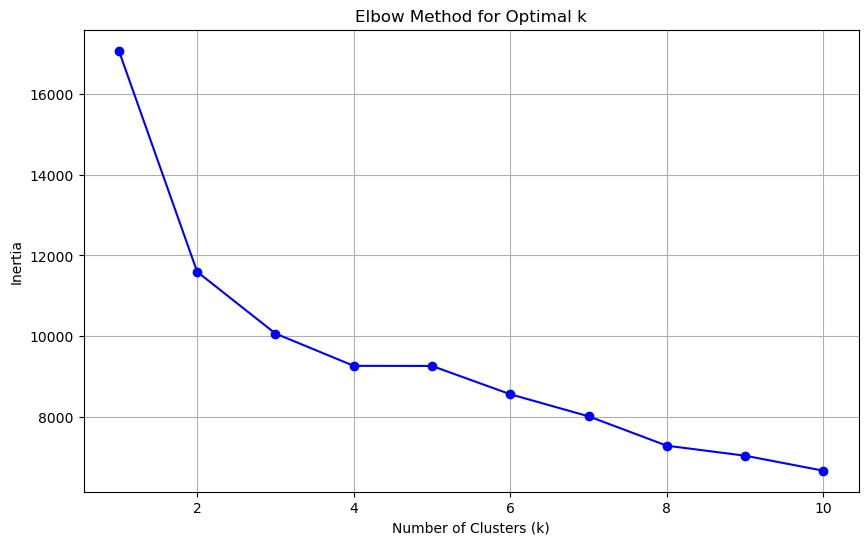

In [4]:
# Calculate inertia for different numbers of clusters
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

### 2. Silhouette Analysis

c:\Users\nwere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nwere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nwere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nwere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

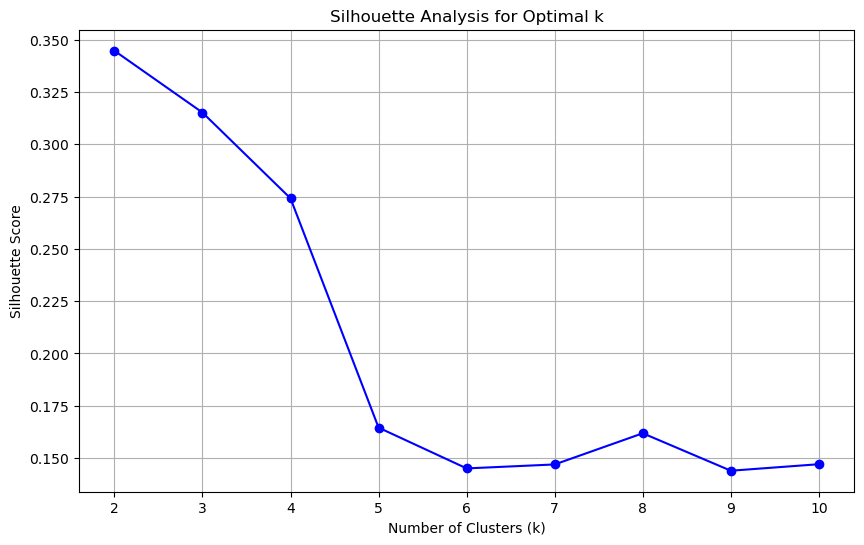

In [5]:
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()

### 3. Gap Statistic

c:\Users\nwere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nwere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nwere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nwere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

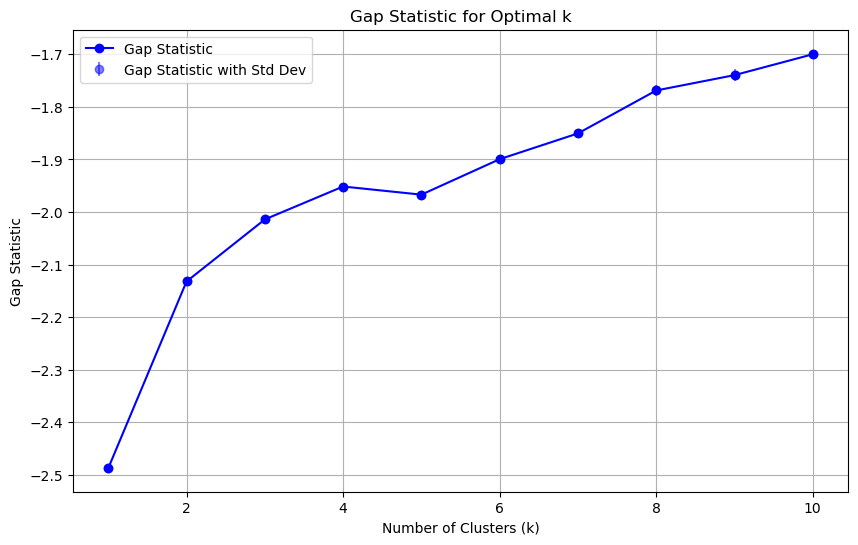

In [6]:
def compute_gap_statistic(data, k_range, n_ref_samples=10, random_seed=None):
    """
    Compute the Gap Statistic for estimating the optimal number of clusters.
    """
    np.random.seed(random_seed)
    
    gap_stats = []
    gap_stds = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_seed)
        kmeans.fit(data)
        Wk = np.log(kmeans.inertia_)
        
        ref_Wks = []
        for _ in range(n_ref_samples):
            ref_data = np.random.rand(*data.shape)
            ref_kmeans = KMeans(n_clusters=k, random_state=random_seed)
            ref_kmeans.fit(ref_data)
            ref_Wk = np.log(ref_kmeans.inertia_)
            ref_Wks.append(ref_Wk)
        
        gap_stat = np.mean(ref_Wks) - Wk
        gap_std = np.std(ref_Wks) * np.sqrt(1 + 1/n_ref_samples)
        
        gap_stats.append(gap_stat)
        gap_stds.append(gap_std)
    
    return np.array(gap_stats), np.array(gap_stds)

# Compute Gap Statistic
k_range = range(1, 11)
gap_stats, gap_stds = compute_gap_statistic(X_scaled, k_range, n_ref_samples=10, random_seed=42)

# Plot Gap Statistic
plt.figure(figsize=(10, 6))
plt.plot(k_range, gap_stats, 'bo-', label='Gap Statistic')
plt.errorbar(k_range, gap_stats, yerr=gap_stds, fmt='o', color='b', alpha=0.5, label='Gap Statistic with Std Dev')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Optimal k')
plt.grid(True)
plt.legend()
plt.show()

### 4. Hierarchical Clustering (Dendrogram)

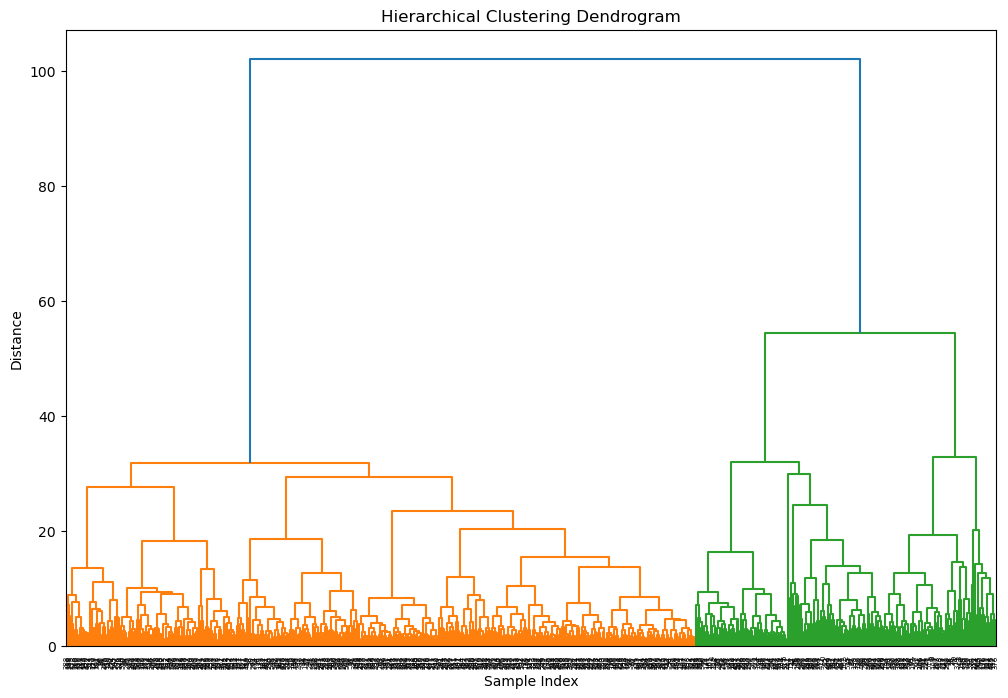

In [7]:
# Compute linkage matrix
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## Clustering Implementation

Based on the above analysis and the fact that we know there are 2 classes in the breast cancer dataset, we'll use 2 clusters.

In [8]:
# Initialize clustering algorithms
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit and predict clusters
kmeans_labels = kmeans.fit_predict(X_scaled)
agg_labels = agg_clustering.fit_predict(X_scaled)

# Evaluate clustering performance
def evaluate_clustering(X, labels, true_labels, algorithm_name):
    print(f"\n{algorithm_name} Clustering Performance:")
    print("-" * 50)
    print(f"Silhouette Score: {silhouette_score(X, labels):.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(X, labels):.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X, labels):.4f}")
    print(f"Adjusted Rand Index: {adjusted_rand_score(true_labels, labels):.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(true_labels, labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {algorithm_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Evaluate both clustering algorithms
evaluate_clustering(X_scaled, kmeans_labels, y, 'K-means')
evaluate_clustering(X_scaled, agg_labels, y, 'Agglomerative Clustering')

c:\Users\nwere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(



K-means Clustering Performance:
--------------------------------------------------
Silhouette Score: 0.3447
Davies-Bouldin Index: 1.3093
Calinski-Harabasz Score: 267.6804
Adjusted Rand Index: 0.6765


NameError: name 'confusion_matrix' is not defined

<Figure size 800x600 with 0 Axes>

## Visualizing Clusters

In [ ]:
# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
plot_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
plot_df['K-means'] = kmeans_labels
plot_df['Agglomerative'] = agg_labels
plot_df['True'] = y

# Plot clusters
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# K-means clusters
scatter1 = ax1.scatter(plot_df['PC1'], plot_df['PC2'], c=plot_df['K-means'], cmap='viridis')
ax1.set_title('K-means Clustering')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
plt.colorbar(scatter1, ax=ax1)

# Agglomerative clusters
scatter2 = ax2.scatter(plot_df['PC1'], plot_df['PC2'], c=plot_df['Agglomerative'], cmap='viridis')
ax2.set_title('Agglomerative Clustering')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
plt.colorbar(scatter2, ax=ax2)

# True labels
scatter3 = ax3.scatter(plot_df['PC1'], plot_df['PC2'], c=plot_df['True'], cmap='viridis')
ax3.set_title('True Labels')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
plt.colorbar(scatter3, ax=ax3)

plt.tight_layout()
plt.show()

## Summary of Clustering Results

Based on the analysis above, we can observe:

1. Both K-means and Agglomerative Clustering perform well on this dataset, with high Adjusted Rand Index scores indicating good agreement with the true labels.

2. The silhouette scores suggest that the clusters are well-separated and compact.

3. The visualization using PCA shows that both clustering algorithms are able to capture the main structure of the data, though there is some overlap between clusters.

4. The high Adjusted Rand Index scores indicate that both clustering algorithms are able to recover the true class structure of the data, which is expected given that the breast cancer dataset is well-structured for binary classification.